## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading Data

In [2]:
df = pd.read_csv("EFA_Data/train.csv")
display(df.head())

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
X = df.iloc[:, 8:-3]
display(X.head())

,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
0,3,4,3,1,5,3,5,5,4,3,4,4,5,5
1,3,2,3,3,1,3,1,1,1,5,3,1,4,1
2,2,2,2,2,5,5,5,5,4,3,4,4,4,5
3,2,5,5,5,2,2,2,2,2,5,3,1,4,2
4,3,3,3,3,4,5,5,3,3,4,4,3,3,3


In [4]:
df.shape[0] == X.shape[0]

True

In [5]:
x = X.values
x_mean = np.mean(x, axis = 0)
x_n = x - np.matrix(x_mean)
x_n = x_n.T

In [6]:
x_n

matrix([[ 0.27031683,  0.27031683, -0.72968317, ..., -1.72968317,
         -1.72968317, -1.72968317],
        [ 0.93970396, -1.06029604, -1.06029604, ..., -2.06029604,
         -2.06029604, -0.06029604],
        [ 0.2430994 ,  0.2430994 , -0.7569006 , ..., -1.7569006 ,
         -1.7569006 ,  0.2430994 ],
        ...,
        [ 0.6957095 , -2.3042905 ,  0.6957095 , ...,  1.6957095 ,
          1.6957095 ,  0.6957095 ],
        [ 1.3595723 ,  0.3595723 ,  0.3595723 , ...,  1.3595723 ,
          0.3595723 , -0.6404277 ],
        [ 1.71364914, -2.28635086,  1.71364914, ...,  0.71364914,
         -2.28635086, -2.28635086]])

In [ ]:
# X_mean = np.mean(X, axis = 0)
# X_n = X - X_mean
# X_n = X_n.T

## Finding Cov Matrix and Correlation

In [7]:
C1 = np.cov(x_n)
C2 = np.corrcoef(x_n)## Corr(x,y) = Cov(x,y)/sqrt(Var(x)*Var(y))
eig_val,eig_vec = np.linalg.eig(C1)

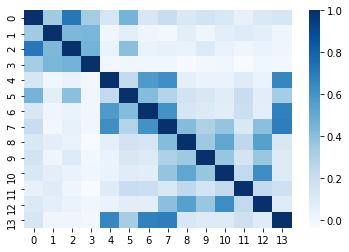

In [8]:
ax = sns.heatmap(C2,cmap='Blues')

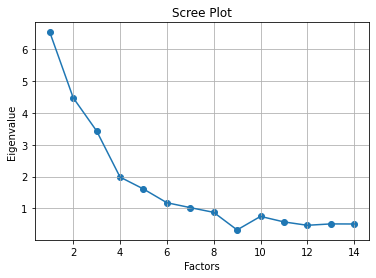

In [9]:
plt.scatter(range(1,x.shape[1]+1),eig_val)
plt.plot(range(1,x.shape[1]+1),eig_val)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

## Eig Vectors and Values for most relevant Features

In [10]:
eig_sorted = np.sort(eig_val)[::-1]
arg_sort = np.argsort(eig_val)[::-1]

eig_vec_ls = []
eig_val_ls = []
imp_vec = arg_sort[:6]
for i in imp_vec:
    e_1 = eig_vec[:,i]
    lambda_1 = eig_val[i]
    eig_vec_ls.append(e_1)
    eig_val_ls.append(lambda_1)
print(eig_vec_ls)
print(eig_val_ls)

[array([0.27033179, 0.15491373, 0.21598175, 0.09124768, 0.32248111,
       0.31012556, 0.35572388, 0.42488029, 0.24281505, 0.20346816,
       0.20154101, 0.16263595, 0.20267719, 0.36360393]), array([ 0.39021937,  0.49052653,  0.51498574,  0.37850549, -0.20260897,
        0.09688795, -0.1994409 , -0.22052189, -0.06650134, -0.02366476,
       -0.04491473, -0.04552343, -0.04930291, -0.2197468 ]), array([ 0.05306717, -0.00824977,  0.07508455,  0.06404967,  0.31940211,
        0.14576517,  0.27020783,  0.0037756 , -0.4376789 , -0.36397705,
       -0.42392401, -0.16410797, -0.43174682,  0.27201769]), array([ 0.29507948, -0.55943443,  0.23840316, -0.34378726, -0.18938634,
        0.56080336, -0.04353424, -0.1367677 , -0.02140229,  0.14949426,
       -0.06588441,  0.01995804, -0.07864663, -0.14225432]), array([ 0.16085078, -0.27499485,  0.12104047,  0.15873055,  0.11669324,
       -0.24792399, -0.11317328,  0.24809807, -0.00289838,  0.23974706,
        0.04863539, -0.8039486 ,  0.05307222, -0.

In [11]:
eig_val_arr  = np.array(eig_val_ls)
lambda_1 = np.diag(eig_val_arr)
eig_vec_mat = np.matrix(eig_vec_ls).T
V = eig_vec_mat@np.sqrt(lambda_1)
print(V)

[[ 0.69070483  0.82525254  0.09831266  0.41574278  0.20419989 -0.10110342]
 [ 0.39580866  1.03738639 -0.01528359 -0.78819722 -0.34910565  0.02522343]
 [ 0.55183905  1.08911378  0.13910223  0.3358905   0.15366075 -0.02144001]
 [ 0.23314023  0.80047953  0.11865892 -0.48436805  0.20150826  0.13770203]
 [ 0.8239477  -0.42848608  0.59172685 -0.26682982  0.14814194 -0.00254635]
 [ 0.79237896  0.20490276  0.27004569  0.79012593 -0.31473922 -0.15234458]
 [ 0.90888385 -0.42178611  0.50058914 -0.06133617 -0.14367335  0.10001398]
 [ 1.08558032 -0.46636909  0.00699471 -0.19269448  0.31496022 -0.09952188]
 [ 0.62039882 -0.14063987 -0.81084737 -0.03015408 -0.00367949 -0.34234698]
 [ 0.5198665  -0.05004723 -0.67430674  0.21062515  0.30435863  0.90717761]
 [ 0.51494257 -0.09498759 -0.78536494 -0.09282572  0.06174257 -0.2177531 ]
 [ 0.41553912 -0.09627489 -0.30402772  0.02811924 -1.02061185  0.23836677]
 [ 0.51784555 -0.1042679  -0.79985753 -0.11080665  0.06737512 -0.24238308]
 [ 0.9290176  -0.46472989

In [12]:
var_ls = []
x_var = np.var(x_n,axis=1)
x_var = np.ravel(x_var)

for i in range(V.shape[0]):
    s = np.sum(np.square(np.ravel(V[i,:])))
    sig_2 = x_var[i] - s
    var_ls.append(sig_2)
var_ls = np.array(var_ls)
S = np.diag(var_ls)
print(S)

[[0.37057229 0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.34899754 0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.31004652 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.62891811 0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.46185874 0.
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.33181402
  0.         0.         0.         0.         0.         0.
  0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.45100531 0.         0.         0.         0.         0.
  

In [13]:
C1_inv = np.linalg.inv(C1)
W = V.T@C1_inv
print(W.shape)
print(W)

(6, 14)
[[ 0.10580392  0.06063097  0.08453211  0.03571301  0.1262144   0.12137862
   0.13922513  0.16629195  0.09503427  0.07963447  0.07888021  0.06365334
   0.0793249   0.14230927]
 [ 0.18451462  0.2319447   0.2435102   0.17897573 -0.09580334  0.04581331
  -0.09430532 -0.10427343 -0.03144506 -0.01118984 -0.02123786 -0.02152568
  -0.0233128  -0.10390693]
 [ 0.02864458 -0.00445306  0.04052911  0.03457271  0.17240676  0.07868107
   0.14585269  0.00203799 -0.23625016 -0.1964674  -0.22882555 -0.08858214
  -0.23304814  0.14682961]
 [ 0.20943694 -0.39706671  0.16921011 -0.244008   -0.13441971  0.39803833
  -0.03089906 -0.09707286 -0.01519059  0.10610572 -0.04676241  0.01416551
  -0.05582059 -0.10096707]
 [ 0.12670416 -0.21661685  0.09534508  0.12503402  0.09192071 -0.1952928
  -0.08914799  0.19542992 -0.00228309  0.18885173  0.0383107  -0.63328028
   0.04180564 -0.01146245]
 [-0.08563878  0.02136529 -0.01816057  0.11663931 -0.00215687 -0.12904215
   0.08471598 -0.08429915 -0.28998204  0.768

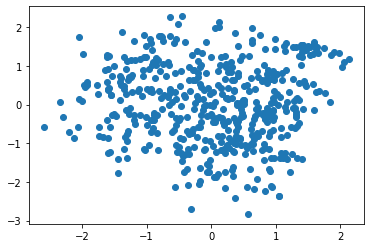

In [14]:
z = W@x_n
z1 = z.T
plt.scatter(np.ravel(z1[:500,0]),np.ravel(z1[:500,1]))
plt.show()

In [15]:
print(z1.shape)
print(z1)

(103904, 6)
[[ 1.17813457 -0.77690998  0.17824378 -0.64483538 -0.4543928  -0.77923271]
 [-1.64286334  0.89139133 -0.56877708  1.43258651  1.68622541  1.39426445]
 [ 1.06568195 -1.37490904  0.5429592   0.37854023 -0.55056556 -0.65430044]
 ...
 [-0.10159264 -1.73737597 -0.01210009 -1.23931199 -0.70372419 -0.38814577]
 [-1.87354186 -0.06824035 -1.3963161  -0.10711844 -0.51719434  2.37843246]
 [-2.16462     0.64493744 -0.26353567 -0.55229893 -1.05195685 -0.602094  ]]
